In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets, metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN, KNeighborsRegressor as KNR
from sklearn.linear_model import LinearRegression
import numpy as np

In [8]:
%%timeit -r1 -n1

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.15, random_state=42)

models = {
  "knn": KNN(),
  "naive_bayes": GaussianNB()
}

for name, model in models.items():
  fit = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  score = metrics.accuracy_score(y_test, y_pred)

  print(f'{name}: {score}')

knn: 1.0
naive_bayes: 1.0
17.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [14]:
diabetes = datasets.load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=.15, random_state=42)

models = {
  "knr": KNR(),
  "lr": LinearRegression()
}

for name, model in models.items():
  fit = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  score = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

  print(f'{name}: {score}')

knr: 56.112030795543305
lr: 56.54400185307309


In [27]:
# Synthetic Data on Linear Regression

X = np.linspace(2, 16, 20).reshape(-1, 1)
y = 3*X +  4 + np.random.uniform(1, 6)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lr = LinearRegression()
fit = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

score = metrics.root_mean_squared_error(y_test, y_pred)
score

cv = cross_val_score(lr, X, y, cv=5)
cv


array([1., 1., 1., 1., 1.])

In [20]:
np.arange(4)

array([0, 1, 2, 3])

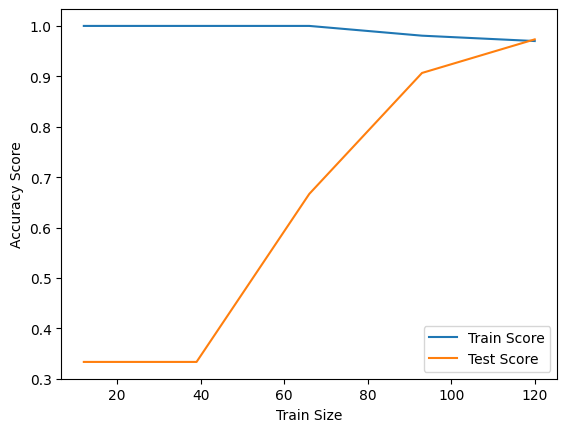

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection

iris = datasets.load_iris()

knn = KNeighborsClassifier()

train_size, train_score, test_score = model_selection.learning_curve(knn, iris.data, iris.target, cv=5)

plt.figure()
plt.plot(train_size, train_score.mean(axis=1), label="Train Score")
plt.plot(train_size, test_score.mean(axis=1), label="Test Score")
plt.xlabel("Train Size")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()